In [9]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

255


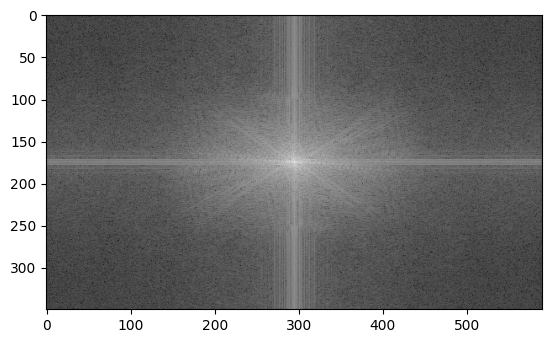

In [10]:
# now we will be loading the image and converting it to grayscale
image = cv2.imread(r"test.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))


# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

print(magnitude[magnitude.shape[0] // 2, magnitude.shape[1] // 2])

# Display the magnitude of the Fourier Transform
plt.imshow(magnitude, cmap='gray')
plt.show()

In [16]:
def azimuthal_integration(freq_scale):
    k, l = np.asarray(freq_scale).shape
    shift_row_idx, shift_col_idx = k // 2, l // 2

    # get the minimum dimension
    m = min(k, l)

    # initialize the azimuthal integration array
    azi_integ = np.zeros(m // 2)

    for wk in range(m // 2):
        current_theta_integration = 0
        theta = np.linspace(0, 2 * np.pi, 100)
        r = np.array(shift_row_idx + wk * np.sin(theta)).astype(int)
        c = np.array(shift_col_idx + wk * np.cos(theta)).astype(int)
        current_theta_integration = np.array(freq_scale[r, c] ** 2).sum()
        azi_integ[wk] = current_theta_integration
    return azi_integ



[  100. 11043. 10091. 11538.  9473. 11125. 10629. 10223. 13949. 11806.
 13422. 12170. 10441. 11021. 10993. 12102. 12050. 12272. 11613. 11564.
 11557. 13438. 10907. 11111.  9246. 12704. 11675. 11533. 10349. 11239.
 10837. 10280. 10834. 10970. 11249. 10324. 10874.  9935.  9719.  9505.
  9277.  9953.  9699.  8278.  8114.  8607.  9104.  8499.  8748.  9153.
  9180.  7488.  8082.  7191.  7050.  6346.  7250.  7710.  7752.  6480.
  7328.  5916.  7032.  6029.  6818.  8046.  7878.  7899.  7764.  7024.
  6774.  5708.  7393.  7529.  7648.  6253.  7549.  6452.  6777.  6813.
  9048.  8334.  8202.  8285.  8503.  7917.  8584.  8677.  9099.  9330.
  8470.  9317.  8209.  8961. 10649.  9434.  9264.  9760. 10095.  9759.
  9668.  9483. 10010. 10374. 10319. 10696. 11060. 10338. 10010. 10477.
 11225. 11783. 10935. 10588. 11388. 10044.  9595. 10802. 12125. 12218.
 12170. 11489. 10678. 11508. 10508. 11065. 12025. 10781. 11394. 12199.
 11413. 11904. 11299. 13659. 10688. 11507. 11723. 11344. 10974. 11581.
 10079

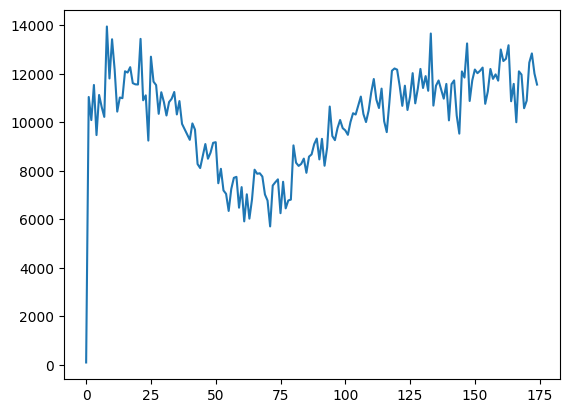

In [17]:
azi_int = azimuthal_integration(magnitude)

print(azi_int)

x = np.arange(magnitude.shape[0] // 2)

plt.plot(x, azi_int)
plt.show()